In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv('diabetes_012_health_indicators.csv')


In [5]:
print("Data Overview:\n", data.head())
print("\nData Info:\n")
data.info()

Data Overview:
    Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

In [7]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [11]:
data = data.dropna()

In [13]:
X = data.drop(columns=['Diabetes_012'])  # Features
y = data['Diabetes_012']  # Target variabl

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest model with 100 trees
model.fit(X_train, y_train)  


RandomForestClassifier(random_state=42)

In [21]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [23]:
print("\nAccuracy of the Random Forest Classifier model:", accuracy)


Accuracy of the Random Forest Classifier model: 0.8410990223904131


In [25]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.47      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736


Confusion Matrix:
 [[41294    31  1470]
 [  845     0    99]
 [ 5610     7  1380]]


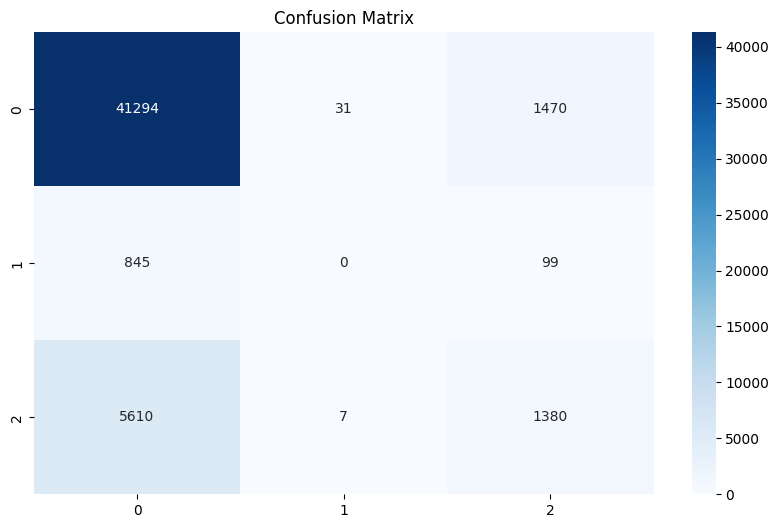

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

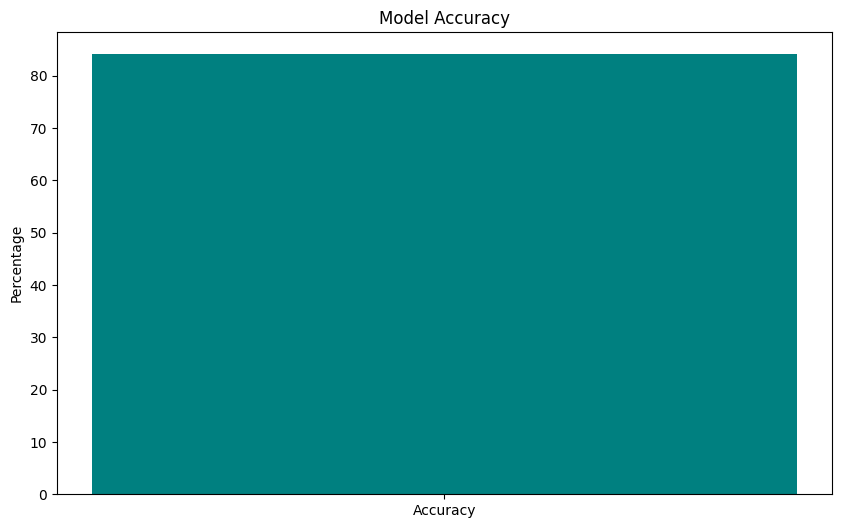

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy'], [accuracy * 100], color='teal')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.show()

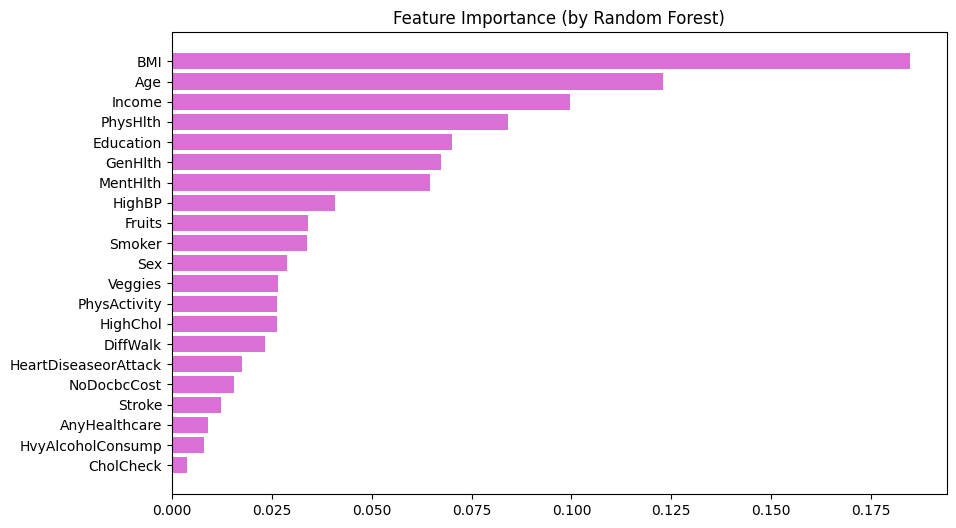

In [31]:
importance = model.feature_importances_  # Extract feature importances
sorted_idx = np.argsort(importance)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importance[sorted_idx], color='orchid')
plt.title('Feature Importance (by Random Forest)')
plt.show()

In [33]:
from sklearn.metrics import roc_curve, auc

In [35]:
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs, pos_label=1)
roc_auc = auc(fpr, tpr)

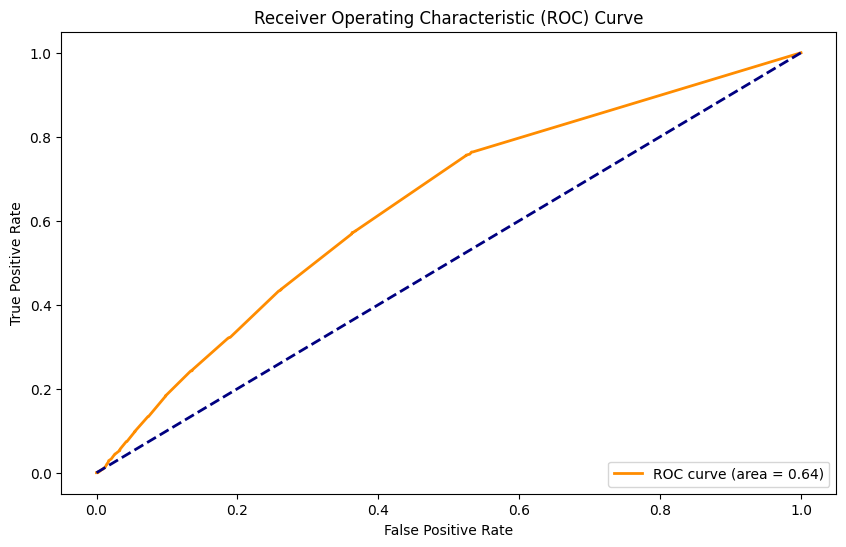

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
all_features = list(X.columns)
user_input = {feature: 0 for feature in all_features}

In [41]:
user_input.update({
    'Age': float(input("Enter Age: ")),
    'BMI': float(input("Enter BMI: ")),
    'HighBP': int(input("Enter High Blood Pressure (1 for Yes, 0 for No): ")),
    'HighChol': int(input("Enter High Cholesterol (1 for Yes, 0 for No): ")),
    'CholCheck': int(input("Enter Cholesterol Check (1 for Yes, 0 for No): ")),
    'Smoker': int(input("Enter Smoker (1 for Yes, 0 for No): ")),
    'Stroke': int(input("Enter Stroke History (1 for Yes, 0 for No): "))
})

user_df = pd.DataFrame([user_input])[all_features]
user_df_scaled = scaler.transform(user_df)
disease_prediction = model.predict(user_df_scaled)

print("\nPrediction for the given patient details:\n")
if disease_prediction[0] == 0:
    print("The patient is not at risk of disease.")
elif disease_prediction[0] == 1:
    print("The patient is at mild risk of diabetes.")
else:
    print("The patient is at severe risk of diabetes.")

Enter Age:  35
Enter BMI:  25
Enter High Blood Pressure (1 for Yes, 0 for No):  1
Enter High Cholesterol (1 for Yes, 0 for No):  0
Enter Cholesterol Check (1 for Yes, 0 for No):  1
Enter Smoker (1 for Yes, 0 for No):  0
Enter Stroke History (1 for Yes, 0 for No):  1



Prediction for the given patient details:

The patient is not at risk of disease.
